<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/Walmart_CaseStudy_Mariya_DSMLJune22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart Case Study

# 1. Objective

##### Objective is to analyze the customer purchase behavior against the customer’s gender and the various other factors to help the business make better decisions. Also Walmart wants to understand if the spending habits differ between male and female customers like, do women spend more on Black Friday than men? 

### Import Packages

In [5]:
# Importing the required packages to do analysis
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson

### Import and read the dataset

In [3]:
# Import the given dataset
dataset_url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094"
wmart_df = pd.read_csv(dataset_url)

# 2. Statistical Summary


### List the data properties

##### Basic info of the dataset

In [ ]:
# Basic info of the dataset
wmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


###### This gives us the basic details like,list of columns in the dataset, their types and if there is any null values

##### Description of the dataset

In [ ]:
# Description of the dataset
wmart_df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


###### From the describe of the dataset, we get to know the values of each column attributes, unique values set, top value, and other statistical information like mean, median, mode, standard deviationis and other percentile information.

##### Size of the dataset

In [ ]:
# Size of the datset. 
wmart_df.size

5500680

##### Shape of the dataset

In [ ]:
wmart_df.shape

(550068, 10)

###### So, from the size and shape of the dataset we can see that there are 5.5+ lakhs of records with 10 column attributes.

##### Columns/Product Attributes

In [ ]:
wmart_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

##### Data Types of Product Attributes

In [ ]:
# Data types of each attributes
wmart_df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

###### From this we can see that certain column types have to be converted to categroical types.

In [ ]:
# COunt of each attributes
for col in wmart_df.columns:
  print(f'{col} : ', wmart_df[col].nunique())

User_ID :  5891
Product_ID :  3631
Gender :  2
Age :  7
Occupation :  21
City_Category :  3
Stay_In_Current_City_Years :  5
Marital_Status :  2
Product_Category :  20
Purchase :  18105


###### From the above result, we can observe that there are, 
###### -- 3 Continuous variables - User_ID, Product_ID, and Purchase
###### -- 7 Categorical varibales - Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status and Product_Category

##### Top 5 Rows

In [ ]:
wmart_df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


##### Bottom 5 Rows

In [ ]:
wmart_df.tail(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


###### The top & bottomr 5 rows from the dataset are listed above.

# 3. Data Pre-processing
### Data Preparation

##### Check for Null Values

In [ ]:
wmart_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

###### Above result indicates that, there is no null value for any of the attributes in the given dataset.

##### Check for duplicates

In [ ]:
wmart_df.duplicated().sum()

0

###### There isn't any duplicate values as well.

##### take a copy of the Dataset

In [4]:
working_df = wmart_df.copy()

###### Taking a working copy of the given dataset for further processing.

##### Data Type Updates

In [ ]:
# Convert the attributes to appropriate types
working_df['Gender'] = working_df['Gender'].astype('category')
working_df['Age'] = working_df['Age'].astype('category')
working_df['Occupation'] = working_df['Occupation'].astype('category')
working_df['City_Category'] = working_df['City_Category'].astype('category')
working_df['Stay_In_Current_City_Years'] = working_df['Stay_In_Current_City_Years'].astype('category')
working_df['Marital_Status'] = working_df['Marital_Status'].astype('category')
working_df['Product_Category'] = working_df['Product_Category'].astype('category')

###### Converting few columns to appropriate datatypes.

In [ ]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


In [ ]:
# Give meaningful names to the 'Marital Status' attribute values
working_df['Marital_Status'].replace([0, 1], ['Single', 'Partnered'], inplace=True)

###### Adding readable/meaningful names to the codes given for Marital Status

# 4. Exploratory Data Analysis
### Graphical & non-graphical analysis of Uni & Bi-variate elements

##### Count by Products

In [ ]:
# Count of each products
prod_cnt = {'Products Count ' : working_df['Product_ID'].value_counts()}
prod_cnt = pd.DataFrame(prod_cnt)
prod_cnt

,Products Count
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
...,...
P00314842,1
P00298842,1
P00231642,1
P00204442,1


In [ ]:
prod_cnt.head(25)

,Products Count
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
P00184942,1440
P00046742,1438
P00058042,1422
P00059442,1406
P00145042,1406


###### This gives us some of the top selling products

In [ ]:
working_df.groupby(['Gender', 'Product_ID']).size().sort_values(ascending=False).head(25).reset_index(name='Counts')

,Gender,Product_ID,Counts
0,M,P00265242,1372
1,M,P00025442,1267
2,M,P00110742,1247
3,M,P00112142,1223
4,M,P00057642,1212
5,M,P00184942,1141
6,M,P00046742,1129
7,M,P00237542,1109
8,M,P00145042,1104
9,M,P00010742,1069


###### this clearly indicates that most of the purchases are done by Male

In [ ]:
# Count of each products
prod_cnt = {'Products Count ' : working_df['Product_ID'].unique()}
prod_cnt = pd.DataFrame(prod_cnt)
prod_cnt

,Products Count
0,P00069042
1,P00248942
2,P00087842
3,P00085442
4,P00285442
...,...
3626,P00375436
3627,P00372445
3628,P00370293
3629,P00371644


###### This shows that there are 3631 products overall. 

In [ ]:
working_df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
# Gender counts
gender_cnt = working_df['Gender'].value_counts()
gender_cnt

M    414259
F    135809
Name: Gender, dtype: int64

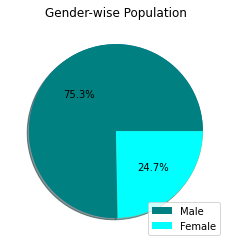

In [ ]:
plt.pie(gender_cnt, autopct='%.1f%%')
plt.title("Gender-wise Population")
# plt.legend(working_df['Gender'].unique())

labels = ['Male', 'Female']
colors = ['teal', 'cyan']

patches, texts = plt.pie(gender_cnt, colors=colors, shadow=True)
plt.legend(patches, labels, loc='lower right')

plt.show()

###### This indicates that the majority of the population is Male with 75%.

In [ ]:
working_df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
city_category_cnt = working_df['City_Category'].value_counts()
city_category_cnt

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

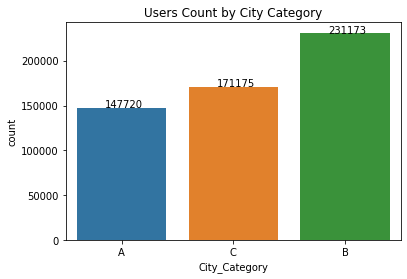

In [ ]:
# Count of Users in each city
ax = sns.countplot(data=working_df, x='City_Category')
plt.title("Users Count by City Category")
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+ 0.05))

plt.show()

###### 42% of the customers are from the City B

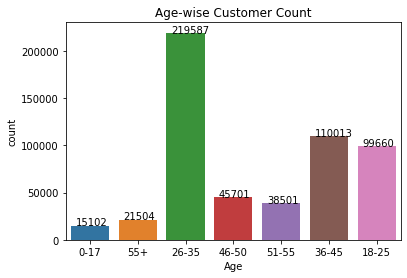

In [ ]:
# Age-wise User ID counts
ax = sns.countplot(data=working_df, x="Age")
plt.title("Age-wise Customer Count")
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.10, p.get_height()+0.05))

plt.show()

###### This indicates around 78% of the customers are of age b/w 18 to 45. Only 11% are below 18 yrs and 33% are above 50 yrs. 

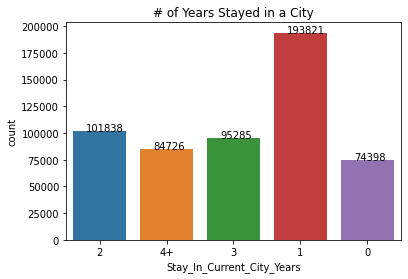

In [ ]:
# # Of years live in a City
ax = sns.countplot(data=working_df, x='Stay_In_Current_City_Years')
plt.title("# of Years Stayed in a City")
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.20, p.get_height()+0.05))

plt.show()

###### About 35% of the customers have lived atleast 1 year in the current city, and the least 13% is lived in less than a year. 

In [ ]:
pd.DataFrame(working_df[working_df.select_dtypes(['int64']).columns].value_counts(), columns=['Count'])

Count
User_ID Purchase       
1005256 8001          5
1005100 10025         5
1002168 8693          4
1002383 6989          4
1001980 8059          4
...                 ...
1001992 7086          1
        6992          1
        6921          1
        6883          1
1006040 23251         1

[539307 rows x 1 columns]

In [ ]:
pd.DataFrame(working_df[working_df.select_dtypes(['object']).columns].value_counts(), columns=['Count'])

,Count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
...,...
P00068742,1
P00012342,1
P00162742,1


###### The products P00265242, P00025442, P00110742 have high frequency of sales.

In [ ]:
# Total Purchase value by Gender
working_df.groupby([working_df['Gender']])['Purchase'].sum().head().sort_values(ascending=False)

Gender
M    3909580100
F    1186232642
Name: Purchase, dtype: int64

In [ ]:
# Total Purchase value Mean by Gender
working_df.groupby([working_df['Gender']])['Purchase'].mean().head().sort_values(ascending=False)

Gender
M    9437.526040
F    8734.565765
Name: Purchase, dtype: float64

In [ ]:
# Total Purchase value Meadian by Gender
working_df.groupby([working_df['Gender']])['Purchase'].median().head().sort_values(ascending=False)

Gender
M    8098.0
F    7914.0
Name: Purchase, dtype: float64

###### The above metrics indicate that both by count & value the top purchase is from Male community.

In [ ]:
# Total Purchase value by Marital Status
working_df.groupby([working_df['Marital_Status']])['Purchase'].sum().head().sort_values(ascending=False)

Marital_Status
0    3008927447
1    2086885295
Name: Purchase, dtype: int64

In [ ]:
# Total Purchase value Mean by Marital Status 
working_df.groupby([working_df['Marital_Status']])['Purchase'].mean().head().sort_values(ascending=False)

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [ ]:
# Total Purchase value Median by Marital Status 
working_df.groupby([working_df['Marital_Status']])['Purchase'].median().head().sort_values(ascending=False)

Marital_Status
1    8051.0
0    8044.0
Name: Purchase, dtype: float64

###### The above metrics indicate that Singles have done more purchases than 'partnered' both by count & value.

### Numerical Variables Analysis

In [ ]:
ms_output = working_df.groupby("Marital_Status").describe(percentiles=[.25, .5, .75]).T
ms_output

Marital_Status                     0             1
User_ID          count  3.247310e+05  2.253370e+05
                 mean   1.002999e+06  1.003071e+06
                 std    1.700466e+03  1.765091e+03
                 min    1.000001e+06  1.000004e+06
                 25%    1.001524e+06  1.001506e+06
                 50%    1.003065e+06  1.003093e+06
                 75%    1.004386e+06  1.004647e+06
                 max    1.006040e+06  1.006039e+06
Occupation       count  3.247310e+05  2.253370e+05
                 mean   7.944782e+00  8.266823e+00
                 std    6.402753e+00  6.687118e+00
                 min    0.000000e+00  0.000000e+00
                 25%    3.000000e+00  2.000000e+00
                 50%    7.000000e+00  7.000000e+00
                 75%    1.400000e+01  1.400000e+01
                 max    2.000000e+01  2.000000e+01
Product_Category count  3.247310e+05  2.253370e+05
                 mean   5.339059e+00  5.498245e+00
                 std    3.912070e+00  3.968868e+00
                 min    1.000000e+00  1.000000e+00
                 25%    1.000000e+00  2.000000e+00
                 50%    5.000000e+00  5.000000e+00
                 75%    8.000000e+00  8.000000e+00
                 max    2.000000e+01  2.000000e+01
Purchase         count  3.247310e+05  2.253370e+05
                 mean   9.265908e+03  9.261175e+03
                 std    5.027348e+03  5.016897e+03
                 min    1.200000e+01  1.200000e+01
                 25%    5.605000e+03  5.843000e+03
                 50%    8.044000e+03  8.051000e+03
                 75%    1.206100e+04  1.204200e+04
                 max    2.396100e+04  2.396100e+04

###### this indicates that 'Singles' top in every category as compared to 'Partnered'

In [ ]:
gen_output = working_df.groupby("Gender").describe(percentiles=[.25, .5, .75]).T
gen_output

Gender                             F             M
User_ID          count  1.358090e+05  4.142590e+05
                 mean   1.003130e+06  1.002996e+06
                 std    1.786631e+03  1.706494e+03
                 min    1.000001e+06  1.000002e+06
                 25%    1.001569e+06  1.001505e+06
                 50%    1.003159e+06  1.003041e+06
                 75%    1.004765e+06  1.004411e+06
                 max    1.006039e+06  1.006040e+06
Occupation       count  1.358090e+05  4.142590e+05
                 mean   6.740540e+00  8.514750e+00
                 std    6.239639e+00  6.553790e+00
                 min    0.000000e+00  0.000000e+00
                 25%    1.000000e+00  3.000000e+00
                 50%    4.000000e+00  7.000000e+00
                 75%    1.100000e+01  1.500000e+01
                 max    2.000000e+01  2.000000e+01
Marital_Status   count  1.358090e+05  4.142590e+05
                 mean   4.196187e-01  4.063859e-01
                 std    4.934984e-01  4.911588e-01
                 min    0.000000e+00  0.000000e+00
                 25%    0.000000e+00  0.000000e+00
                 50%    0.000000e+00  0.000000e+00
                 75%    1.000000e+00  1.000000e+00
                 max    1.000000e+00  1.000000e+00
Product_Category count  1.358090e+05  4.142590e+05
                 mean   5.717714e+00  5.301512e+00
                 std    3.696752e+00  4.006275e+00
                 min    1.000000e+00  1.000000e+00
                 25%    3.000000e+00  1.000000e+00
                 50%    5.000000e+00  5.000000e+00
                 75%    8.000000e+00  8.000000e+00
                 max    2.000000e+01  2.000000e+01
Purchase         count  1.358090e+05  4.142590e+05
                 mean   8.734566e+03  9.437526e+03
                 std    4.767233e+03  5.092186e+03
                 min    1.200000e+01  1.200000e+01
                 25%    5.433000e+03  5.863000e+03
                 50%    7.914000e+03  8.098000e+03
                 75%    1.140000e+04  1.245400e+04
                 max    2.395900e+04  2.396100e+04

###### this indicates that Male top in all categories than female.

### Categorical Variables Analysis

In [ ]:
print(f"Categorical Variables are: {working_df.select_dtypes(['category']).columns}")

Categorical Variables are: Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category'],
      dtype='object')


In [ ]:
# Value Counts
for col in working_df.select_dtypes('category'):
  display(working_df[col].unique())

['F', 'M']
Categories (2, object): ['F', 'M']

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

[10, 16, 15, 7, 20, ..., 18, 5, 14, 13, 6]
Length: 21
Categories (21, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20]

['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

['2', '4+', '3', '1', '0']
Categories (5, object): ['0', '1', '2', '3', '4+']

[0, 1]
Categories (2, int64): [0, 1]

[3, 1, 12, 8, 5, ..., 10, 17, 9, 20, 19]
Length: 20
Categories (20, int64): [1, 2, 3, 4, ..., 17, 18, 19, 20]

In [ ]:
pd.DataFrame(working_df[working_df.select_dtypes(['category']).columns].value_counts(), columns=['Count'])

Count
Gender Age   Occupation City_Category Stay_In_Current_City_Years Marital_Status Product_Category       
M      18-25 4          B             1                          0              1                  1113
                                                                                5                  1041
                                      4+                         0              1                   947
                                                                                5                   901
       26-35 7          A             1                          0              1                   793
...                                                                                                 ...
F      51-55 14         C             1                          1              20                    1
M      46-50 7          A             1                          1              10                    1
F      51-55 16         A             3                          0              6                     1
M      46-50 7          A             1                          1              6                     1
F      0-17  0          A             2                          0              1                     1

[29839 rows x 1 columns]

## Visual Analysis
### Univariate Analysis

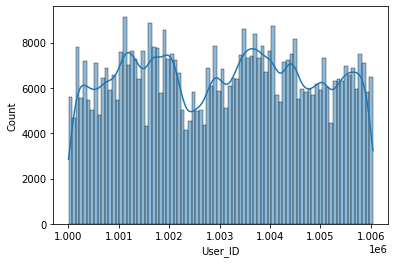

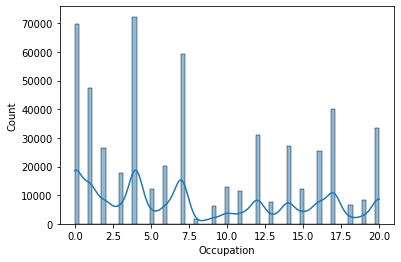

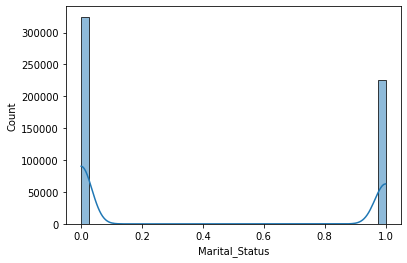

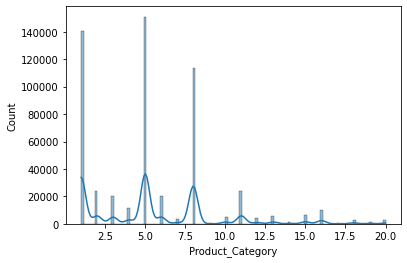

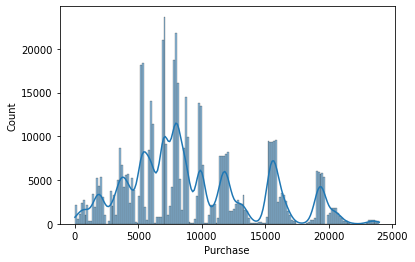

In [ ]:
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  num_graph = sns.histplot(data=working_df, x=col, kde=True)
  plt.show()
  print()

In [ ]:
object_variables = working_df.select_dtypes(['object'])
for col in object_variables:
  obj_graph = sns.histplot(data=working_df, x=col, kde=True)
  plt.show()
  print()

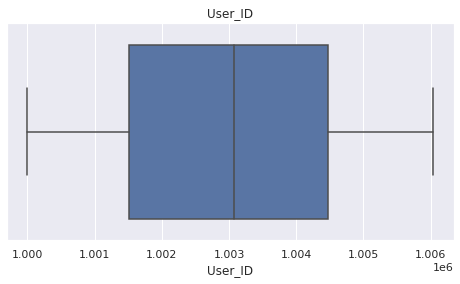

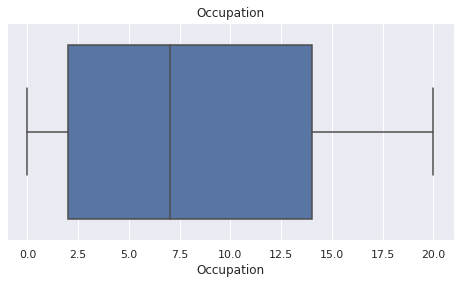

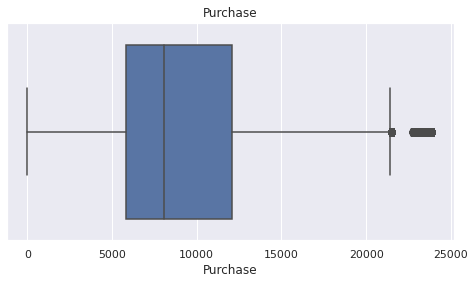

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize': (8, 4)})
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  g = sns.boxplot(data=working_df, x=col)
  g.set(title=f'{col}')
  plt.show()
  print()

###### the larger purchase is b/w 5K to 12K, and there are some outliers above 21K.

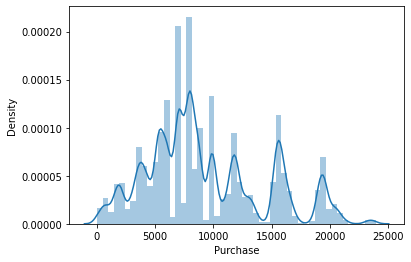

In [ ]:
# Purchase value distribution
sns.distplot(working_df['Purchase'], hist=True, kde=True)

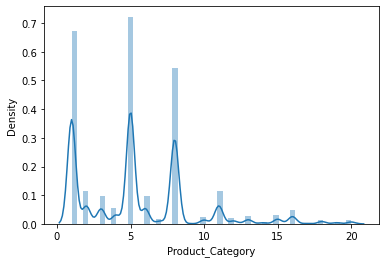

In [ ]:
sns.distplot(working_df['Product_Category'], hist=True, kde=True)

###### Univariate analysis of the attributes indicate low-middle end Occupation type has more customers. Similarly lower end product category have more count of Sales. 

### Bivariate Analysis

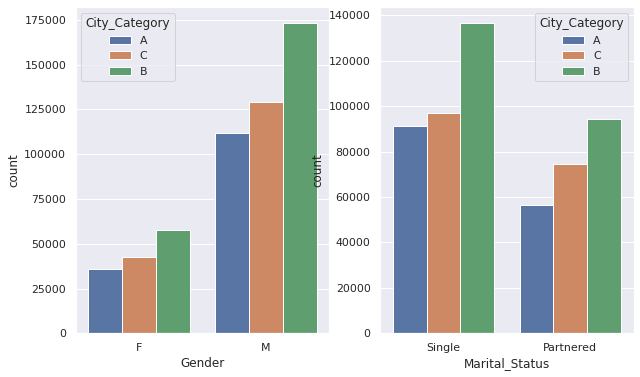

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.set(rc = {'figure.figsize': (10, 10)})
sub1 = sns.countplot(data=working_df, x='Gender', hue='City_Category', ax=ax[0])
sub2 = sns.countplot(data=working_df, x='Marital_Status', hue='City_Category', ax=ax[1])
plt.show()

###### City B has more number of customer and that too Male, Singles top the count.

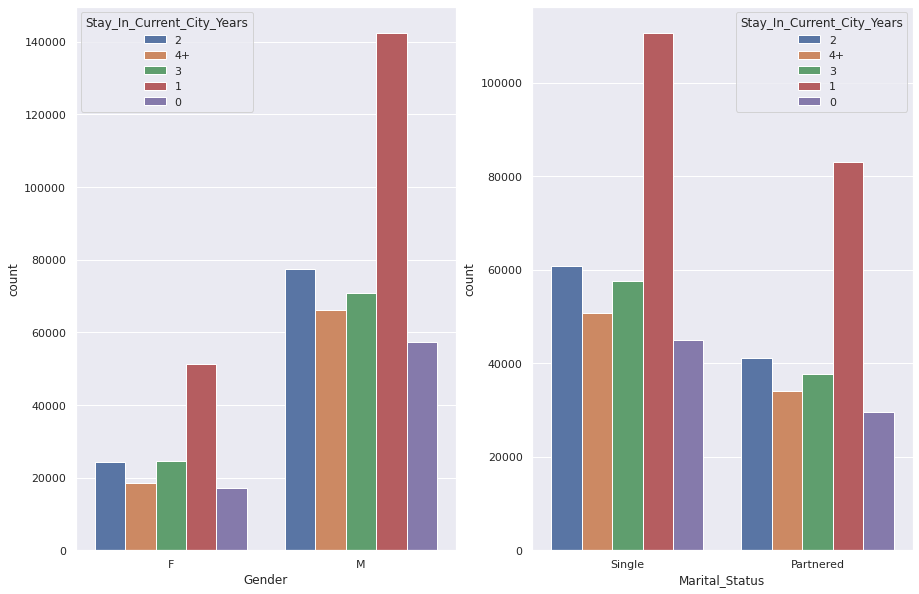

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.set(rc = {'figure.figsize': (7, 10)})
sub1 = sns.countplot(data=working_df, x='Gender', hue='Stay_In_Current_City_Years', ax=ax[0])
sub2 = sns.countplot(data=working_df, x='Marital_Status', hue='Stay_In_Current_City_Years', ax=ax[1])
plt.show()

###### Incidently in terms of \# of yrs of stay in the city also topped by Male, Singles in 1 yr of stay category. 

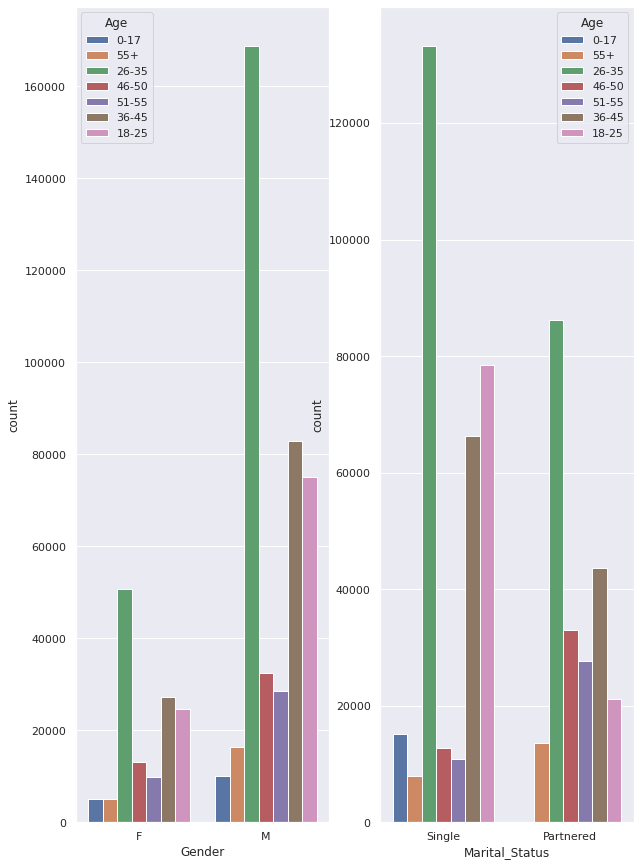

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.set(rc = {'figure.figsize': (7, 10)})
sub1 = sns.countplot(data=working_df, x='Gender', hue='Age', ax=ax[0])
sub2 = sns.countplot(data=working_df, x='Marital_Status', hue='Age', ax=ax[1])
plt.show()

###### The age group 26-35 has more number of customers especially in Male, Singles segment

### Boxplot for Categorical Variables

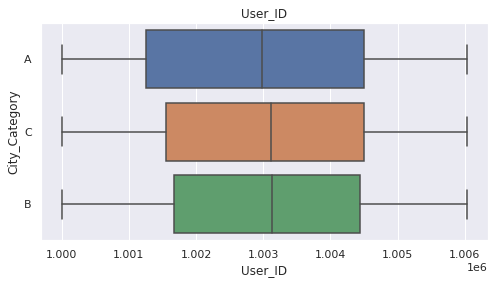

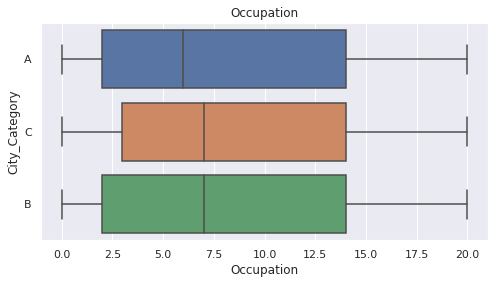

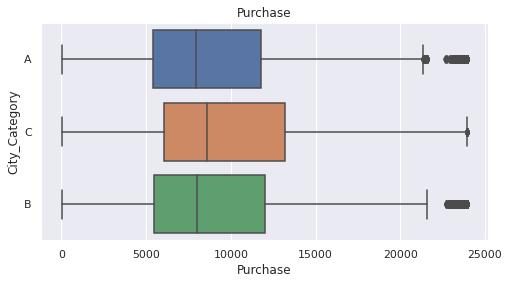

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize' : {8,4}})
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  g = sns.boxplot(data=working_df, x=col, y='City_Category')
  g.set(title=f'{col}')
  plt.show()
  print()

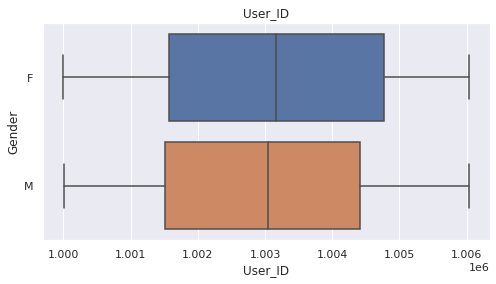

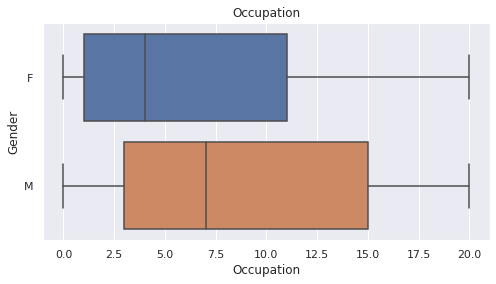

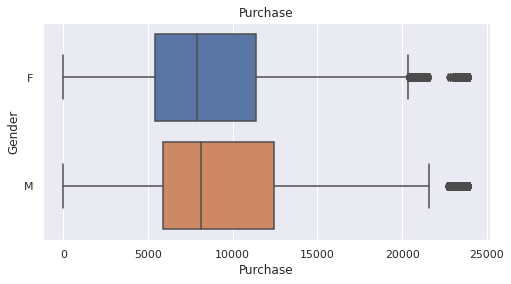

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize' : {8,4}})
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  g = sns.boxplot(data=working_df, x=col, y='Gender')
  g.set(title=f'{col}')
  plt.show()
  print()

###### Male segment seem to have spread across in various Occupation types

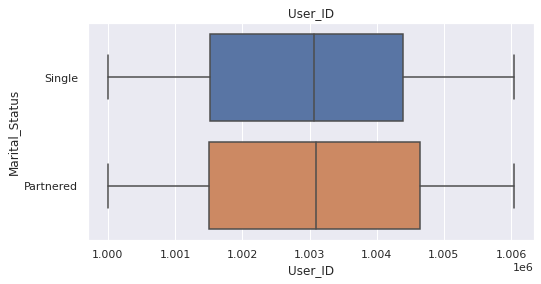

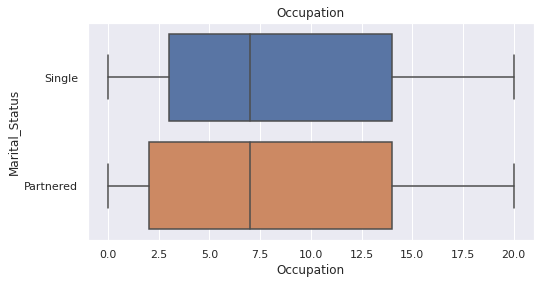

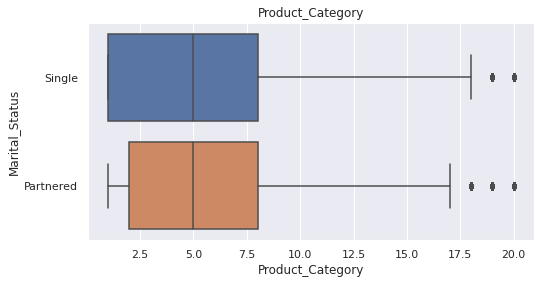

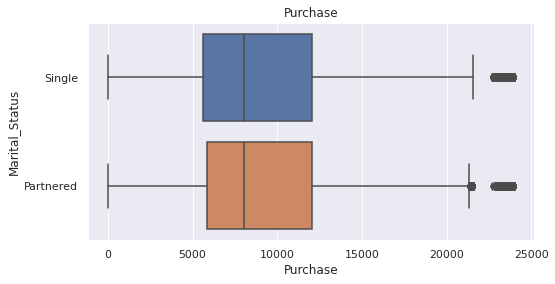

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize' : {8,4}})
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  g = sns.boxplot(data=working_df, x=col, y='Marital_Status')
  g.set(title=f'{col}')
  plt.show()
  print()

###### majority of the purchase values are b/w 5K to 12K

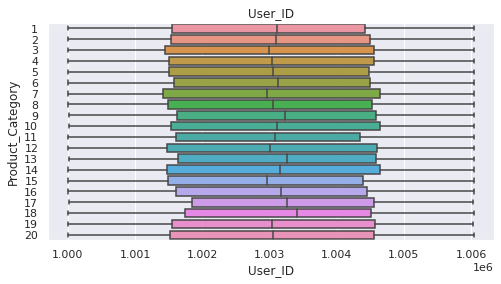

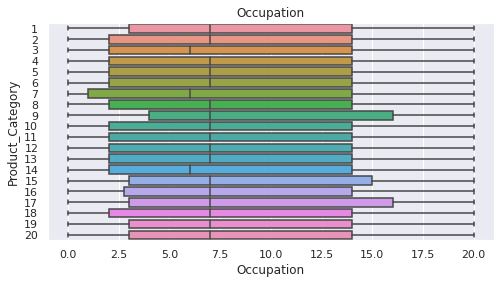

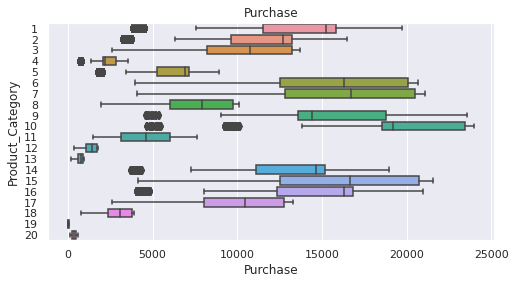

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize' : {8,4}})
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  g = sns.boxplot(data=working_df, x=col, y='Product_Category')
  g.set(title=f'{col}')
  plt.show()
  print()

In [ ]:
pd.crosstab(index=working_df['Gender'], columns=working_df['Purchase'], margins=True)

Purchase,12,13,14,24,25,26,36,37,38,48,...,23952,23953,23954,23955,23956,23958,23959,23960,23961,All
Gender,,,,,,,,,,,,,,,,,,,,,
F,27,25,30,28,30,27,36,31,34,33,...,0,0,0,1,0,0,1,0,0,135809
M,74,81,65,90,83,85,71,79,80,75,...,1,2,2,2,1,4,1,4,3,414259
All,101,106,95,118,113,112,107,110,114,108,...,1,2,2,3,1,4,2,4,3,550068


###### Clearly high volume of purchase is from Male community

In [ ]:
pd.crosstab(index=working_df['Marital_Status'], columns=working_df['Purchase'], margins=True)

Purchase,12,13,14,24,25,26,36,37,38,48,...,23952,23953,23954,23955,23956,23958,23959,23960,23961,All
Marital_Status,,,,,,,,,,,,,,,,,,,,,
0,57,63,53,78,69,59,64,67,65,62,...,1,1,1,2,1,2,1,1,2,324731
1,44,43,42,40,44,53,43,43,49,46,...,0,1,1,1,0,2,1,3,1,225337
All,101,106,95,118,113,112,107,110,114,108,...,1,2,2,3,1,4,2,4,3,550068


###### Similarly high volume of purchase is from 'Singles' category

In [ ]:
pd.crosstab(index=working_df['Gender'], columns=working_df['City_Category'], margins=True)

City_Category,A,B,C,All
Gender,,,,
F,35704,57796,42309,135809
M,112016,173377,128866,414259
All,147720,231173,171175,550068


###### More number male and female live in the City B.

In [ ]:
pd.crosstab(index=working_df['Gender'], columns=working_df['Product_Category'], margins=True)

Product_Category,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,All
Gender,,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,4559,943,33558,70,1162,...,1532,1462,623,1046,2402,62,382,451,723,135809
M,115547,18206,14207,8114,108972,15907,2778,80367,340,3963,...,2415,4087,900,5244,7426,516,2743,1152,1827,414259
All,140378,23864,20213,11753,150933,20466,3721,113925,410,5125,...,3947,5549,1523,6290,9828,578,3125,1603,2550,550068


In [ ]:
from IPython.display import display

for col in object_variables:
  print('Table for', str(col), 'vs Product')
  display(pd.crosstab(working_df[col],working_df['Product_Category'], margins=True, normalize='index'))
  print("\n")

Table for Product_ID vs Product


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Product_ID,,,,,,,,,,,,,,,,,,,,
P00000142,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P00000242,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P00000342,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P00000442,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P00000542,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0099642,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P0099742,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P0099842,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000




Table for Gender vs Product


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,0.182838,0.041661,0.044224,0.026795,0.308971,0.033569,0.006944,0.247097,0.000515,0.008556,0.034895,0.011281,0.010765,0.004587,0.007702,0.017687,0.000457,0.002813,0.003321,0.005324
M,0.278925,0.043948,0.034295,0.019587,0.263053,0.038399,0.006706,0.194002,0.000821,0.009566,0.047188,0.005830,0.009866,0.002173,0.012659,0.017926,0.001246,0.006621,0.002781,0.004410
All,0.255201,0.043384,0.036746,0.021366,0.274390,0.037206,0.006765,0.207111,0.000745,0.009317,0.044153,0.007175,0.010088,0.002769,0.011435,0.017867,0.001051,0.005681,0.002914,0.004636




Table for Age vs Product


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,
0-17,0.237386,0.053304,0.079460,0.050192,0.286717,0.026420,0.003509,0.149517,0.001059,0.007350,0.049000,0.008277,0.007416,0.002582,0.010595,0.015164,0.000397,0.001788,0.003907,0.005959
18-25,0.270540,0.044431,0.047261,0.024714,0.286193,0.037618,0.004826,0.179721,0.000632,0.006051,0.046127,0.004405,0.007586,0.002308,0.010275,0.016035,0.000411,0.003402,0.002759,0.004706
26-35,0.265266,0.040658,0.034893,0.019090,0.279948,0.038641,0.007519,0.201542,0.000701,0.008138,0.044966,0.004991,0.009545,0.002568,0.010802,0.018753,0.000578,0.004745,0.002564,0.004089
36-45,0.251316,0.044649,0.035032,0.021397,0.267032,0.035441,0.007354,0.211757,0.000973,0.011226,0.045022,0.009035,0.011362,0.002836,0.012680,0.017771,0.001227,0.006381,0.002909,0.004599
46-50,0.229185,0.046060,0.030109,0.021663,0.261942,0.035492,0.007155,0.233168,0.000722,0.011378,0.046038,0.011378,0.012057,0.003260,0.013173,0.019234,0.002079,0.007680,0.003260,0.004967
51-55,0.235033,0.046259,0.023999,0.017610,0.256954,0.037661,0.006909,0.242591,0.000753,0.013480,0.037869,0.011246,0.012545,0.004000,0.013194,0.017454,0.002779,0.010987,0.003480,0.005195
55+,0.205125,0.042085,0.022647,0.014788,0.249581,0.040086,0.006231,0.288690,0.000372,0.016276,0.026088,0.015811,0.013997,0.003488,0.010649,0.017532,0.003116,0.011207,0.004790,0.007440
All,0.255201,0.043384,0.036746,0.021366,0.274390,0.037206,0.006765,0.207111,0.000745,0.009317,0.044153,0.007175,0.010088,0.002769,0.011435,0.017867,0.001051,0.005681,0.002914,0.004636




Table for City_Category vs Product


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
City_Category,,,,,,,,,,,,,,,,,,,,
A,0.237483,0.041572,0.033462,0.020647,0.285750,0.037280,0.008299,0.217838,0.000745,0.009024,0.044686,0.007196,0.010926,0.003256,0.011623,0.019280,0.000819,0.005097,0.001848,0.003168
B,0.251989,0.045178,0.037145,0.022606,0.277446,0.036881,0.006917,0.205703,0.000753,0.008924,0.045356,0.007246,0.009824,0.002734,0.011411,0.017467,0.001155,0.006008,0.001999,0.003257
C,0.274830,0.042524,0.039042,0.020313,0.260459,0.037581,0.005234,0.199755,0.000736,0.010101,0.042068,0.007063,0.009721,0.002395,0.011304,0.017187,0.001110,0.005743,0.005071,0.007764
All,0.255201,0.043384,0.036746,0.021366,0.274390,0.037206,0.006765,0.207111,0.000745,0.009317,0.044153,0.007175,0.010088,0.002769,0.011435,0.017867,0.001051,0.005681,0.002914,0.004636




Table for Stay_In_Current_City_Years vs Product


Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Stay_In_Current_City_Years,,,,,,,,,,,,,,,,,,,,
0,0.249402,0.043012,0.037488,0.021331,0.276889,0.036789,0.007500,0.206202,0.000833,0.008938,0.046843,0.007231,0.010417,0.002903,0.012312,0.017742,0.001156,0.005726,0.002675,0.004610
1,0.251877,0.043231,0.036157,0.021148,0.273974,0.037488,0.006661,0.212330,0.000681,0.009560,0.042023,0.007264,0.010350,0.002967,0.011299,0.018213,0.000867,0.006233,0.003132,0.004545
2,0.260345,0.045268,0.038414,0.020955,0.275987,0.036656,0.005902,0.198727,0.000854,0.008916,0.045229,0.007198,0.009613,0.002445,0.011351,0.017714,0.001129,0.005165,0.002907,0.005224
3,0.262171,0.044393,0.037624,0.022060,0.276770,0.036113,0.007241,0.200178,0.000808,0.009582,0.042021,0.007126,0.009897,0.002477,0.011041,0.017044,0.001207,0.005132,0.002666,0.004450
4+,0.253877,0.040660,0.034452,0.021611,0.268548,0.038819,0.006857,0.213842,0.000614,0.009277,0.047766,0.006952,0.009985,0.002915,0.011519,0.018294,0.001109,0.005618,0.002915,0.004367
All,0.255201,0.043384,0.036746,0.021366,0.274390,0.037206,0.006765,0.207111,0.000745,0.009317,0.044153,0.007175,0.010088,0.002769,0.011435,0.017867,0.001051,0.005681,0.002914,0.004636


In [ ]:
from IPython.display import display

for col in object_variables:
  print('Table for', str(col), 'vs Purchase')
  display(pd.crosstab(working_df[col],working_df['Purchase'], margins=True, normalize=True))
  print("\n")

Table for Product_ID vs Purchase


Purchase,12,13,14,24,25,26,36,37,38,48,...,23952,23953,23954,23955,23956,23958,23959,23960,23961,All
Product_ID,,,,,,,,,,,,,,,,,,,,,
P00000142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002094
P00000242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000684
P00000342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000444
P00000442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000167
P00000542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0099642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000024
P0099742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000229
P0099842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000185




Table for Gender vs Purchase


Purchase,12,13,14,24,25,26,36,37,38,48,...,23952,23953,23954,23955,23956,23958,23959,23960,23961,All
Gender,,,,,,,,,,,,,,,,,,,,,
F,0.000049,0.000045,0.000055,0.000051,0.000055,0.000049,0.000065,0.000056,0.000062,0.000060,...,0.000000,0.000000,0.000000,0.000002,0.000000,0.000000,0.000002,0.000000,0.000000,0.246895
M,0.000135,0.000147,0.000118,0.000164,0.000151,0.000155,0.000129,0.000144,0.000145,0.000136,...,0.000002,0.000004,0.000004,0.000004,0.000002,0.000007,0.000002,0.000007,0.000005,0.753105
All,0.000184,0.000193,0.000173,0.000215,0.000205,0.000204,0.000195,0.000200,0.000207,0.000196,...,0.000002,0.000004,0.000004,0.000005,0.000002,0.000007,0.000004,0.000007,0.000005,1.000000




Table for Age vs Purchase


Purchase,12,13,14,24,25,26,36,37,38,48,...,23952,23953,23954,23955,23956,23958,23959,23960,23961,All
Age,,,,,,,,,,,,,,,,,,,,,
0-17,0.000005,0.000005,0.000004,0.000009,0.000009,0.000009,0.000004,0.000009,0.000009,0.000004,...,0.000000,0.000002,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.027455
18-25,0.000036,0.000031,0.000035,0.000038,0.000029,0.000029,0.000038,0.000038,0.000049,0.000040,...,0.000002,0.000000,0.000002,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.181178
26-35,0.000053,0.000091,0.000060,0.000084,0.000062,0.000076,0.000062,0.000075,0.000065,0.000064,...,0.000000,0.000002,0.000000,0.000002,0.000002,0.000000,0.000002,0.000000,0.000005,0.399200
36-45,0.000042,0.000029,0.000035,0.000040,0.000045,0.000038,0.000040,0.000045,0.000045,0.000036,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.199999
46-50,0.000022,0.000018,0.000013,0.000016,0.000022,0.000022,0.000022,0.000011,0.000013,0.000027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.083082
51-55,0.000013,0.000009,0.000024,0.000015,0.000022,0.000015,0.000020,0.000015,0.000011,0.000007,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000002,0.000002,0.000000,0.069993
55+,0.000013,0.000009,0.000004,0.000013,0.000016,0.000015,0.000009,0.000007,0.000015,0.000018,...,0.000000,0.000000,0.000002,0.000002,0.000000,0.000002,0.000000,0.000002,0.000000,0.039093
All,0.000184,0.000193,0.000173,0.000215,0.000205,0.000204,0.000195,0.000200,0.000207,0.000196,...,0.000002,0.000004,0.000004,0.000005,0.000002,0.000007,0.000004,0.000007,0.000005,1.000000




Table for City_Category vs Purchase


Purchase,12,13,14,24,25,26,36,37,38,48,...,23952,23953,23954,23955,23956,23958,23959,23960,23961,All
City_Category,,,,,,,,,,,,,,,,,,,,,
A,0.000029,0.000031,0.000027,0.000044,0.000029,0.000042,0.000027,0.000031,0.000047,0.000035,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.000002,0.000002,0.268549
B,0.000045,0.000045,0.000053,0.000060,0.000062,0.000055,0.000064,0.000055,0.000049,0.000049,...,0.000000,0.000002,0.000004,0.000002,0.000000,0.000002,0.000002,0.000004,0.000000,0.420263
C,0.000109,0.000116,0.000093,0.000111,0.000115,0.000107,0.000104,0.000115,0.000111,0.000113,...,0.000002,0.000002,0.000000,0.000004,0.000002,0.000004,0.000002,0.000002,0.000004,0.311189
All,0.000184,0.000193,0.000173,0.000215,0.000205,0.000204,0.000195,0.000200,0.000207,0.000196,...,0.000002,0.000004,0.000004,0.000005,0.000002,0.000007,0.000004,0.000007,0.000005,1.000000




Table for Stay_In_Current_City_Years vs Purchase


Purchase,12,13,14,24,25,26,36,37,38,48,...,23952,23953,23954,23955,23956,23958,23959,23960,23961,All
Stay_In_Current_City_Years,,,,,,,,,,,,,,,,,,,,,
0,0.000022,0.000025,0.000018,0.000024,0.000020,0.000022,0.000022,0.000035,0.000029,0.000018,...,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.135252
1,0.000067,0.000067,0.000071,0.000091,0.000087,0.000073,0.000075,0.000049,0.000065,0.000075,...,0.000002,0.000002,0.000000,0.000002,0.000000,0.000004,0.000002,0.000004,0.000002,0.352358
2,0.000029,0.000025,0.000038,0.000055,0.000036,0.000033,0.000044,0.000040,0.000029,0.000040,...,0.000000,0.000000,0.000000,0.000000,0.000002,0.000002,0.000000,0.000002,0.000002,0.185137
3,0.000031,0.000044,0.000029,0.000024,0.000027,0.000042,0.000027,0.000042,0.000036,0.000035,...,0.000000,0.000002,0.000002,0.000002,0.000000,0.000000,0.000002,0.000000,0.000002,0.173224
4+,0.000035,0.000031,0.000016,0.000022,0.000035,0.000035,0.000027,0.000035,0.000047,0.000029,...,0.000000,0.000000,0.000000,0.000002,0.000000,0.000002,0.000000,0.000000,0.000000,0.154028
All,0.000184,0.000193,0.000173,0.000215,0.000205,0.000204,0.000195,0.000200,0.000207,0.000196,...,0.000002,0.000004,0.000004,0.000005,0.000002,0.000007,0.000004,0.000007,0.000005,1.000000


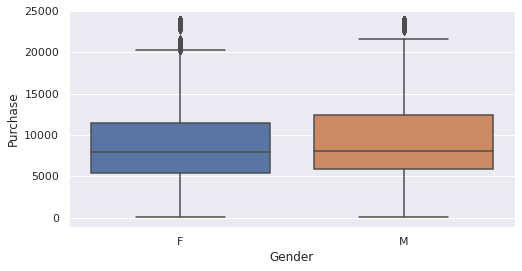

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=working_df)

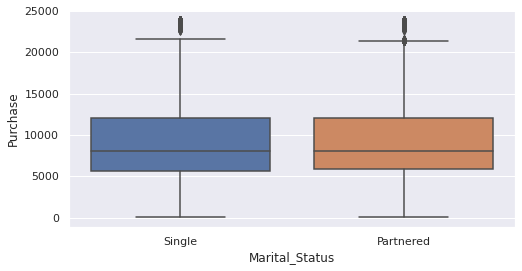

In [ ]:
sns.boxplot(x='Marital_Status', y='Purchase', data=working_df)

### Scatter Plot for Continuous Variables

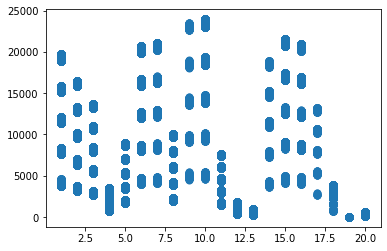

In [ ]:
# Association b/w Product Category and Purchase value
plt.scatter(working_df['Product_Category'], working_df['Purchase'], 
            linewidths=2,
            marker='o')

In [ ]:
# Highest fequecy of each Category attribute
working_df.describe(include='object').T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


###### Clearly, the product with ID: P00265242 was purchased more number of times. 
The age group 26-35 has the highest number of customers.
City B seem to have large customer base and
1 year of Stay in the current City more customers

In [ ]:
# Top 5 items ini each category
col_list = working_df.columns
for column in col_list:
  print(working_df[column].value_counts().head())

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
Name: User_ID, dtype: int64
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: Product_ID, dtype: int64
M    414259
F    135809
Name: Gender, dtype: int64
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
Name: Age, dtype: int64
4     72308
0     69638
7     59133
1     47426
17    40043
Name: Occupation, dtype: int64
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
Single       324731
Partnered    225337
Name: Marital_Status, dtype: int64
5     150933
1     140378
8     113925
11     24287
2      23864
Name: Product_Category, dtype: int64
7011    191
7193    188
6855    187
6891    184
7012    183
Name: Purchase, dtype: int64


### Correlation Analyis using Pairplot, Heatmap

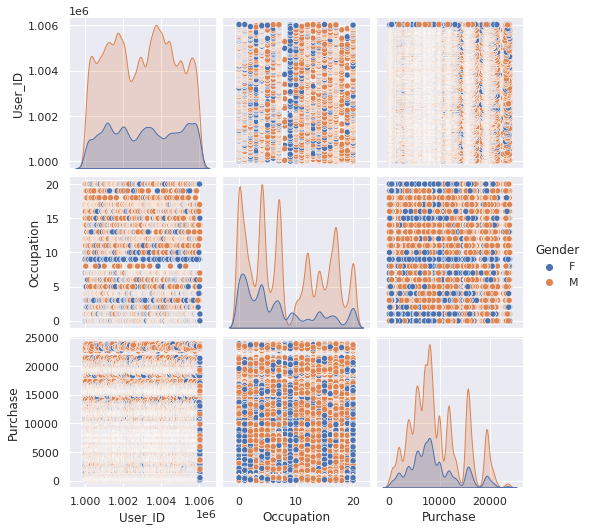

In [ ]:
sns.pairplot(working_df, hue='Gender')
plt.show()

In [ ]:
# Correlation
working_df.corr()

,User_ID,Occupation,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.003825,0.004716
Occupation,-0.023971,1.000000,-0.007618,0.020833
Product_Category,0.003825,-0.007618,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.343703,1.000000


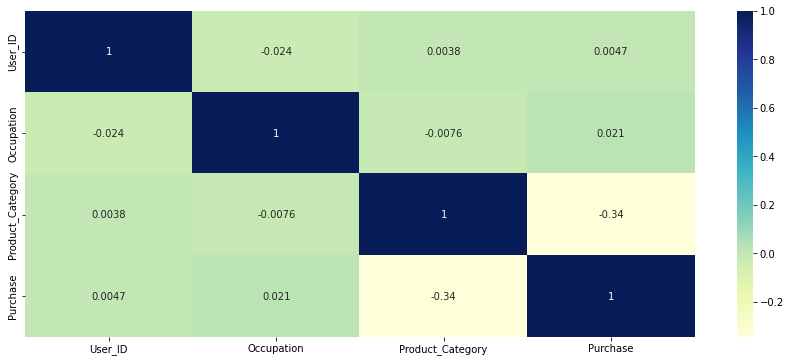

In [ ]:
# Correlation representation in Heatmap
plt.figure(figsize=(15,6))
sns.heatmap(working_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# 5. Analysis based on Confidence Intervals

#### CI Analysis based on Gender

In [6]:
## Segregating the Dataset in terms of Gender
male_df = working_df[working_df['Gender'] == 'M']
male_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [9]:
female_df = working_df[working_df['Gender'] == 'F']
female_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [13]:
## Using sample population of 5000 customers both Male and Female

samp_male = working_df[working_df['Gender'] == 'M'].sample(5000)
samp_female = working_df[working_df['Gender'] == 'F'].sample(5000)

In [16]:
# High purchase volume analysis by gender
print('Volume of purchase by female customers over 20,000:',len(samp_female[samp_female['Purchase']>20000]))
print('Volume of purchase by male customers over 20,000:',len(samp_male[samp_male['Purchase']>20000]))
print('\n')
print('Volume of purchase by female customers over 21,000:',len(samp_female[samp_female['Purchase']>21000]))
print('Volume of purchase by male customers over 21,000:',len(samp_male[samp_male['Purchase']>21000]))
print('\n')
print('Volume of purchase by female customers over 22,000:',len(samp_female[samp_female['Purchase']>22000]))
print('Volume of purchase by male customers over 22,000:',len(samp_male[samp_male['Purchase']>22000]))
print('\n')
print('Volume of purchase by female customers over 23,000:',len(samp_female[samp_female['Purchase']>23000]))
print('Volume of purchase by male customers over 23,000:',len(samp_male[samp_male['Purchase']>23000]))
print('\n')
print('Volume of purchase by female customers over 23,500:',len(samp_female[samp_female['Purchase']>23500]))
print('Volume of purchase by male customers over 23,500:',len(samp_male[samp_male['Purchase']>23500]))


Volume of purchase by female customers over 20,000: 109
Volume of purchase by male customers over 20,000: 118


Volume of purchase by female customers over 21,000: 24
Volume of purchase by male customers over 21,000: 36


Volume of purchase by female customers over 22,000: 14
Volume of purchase by male customers over 22,000: 22


Volume of purchase by female customers over 23,000: 14
Volume of purchase by male customers over 23,000: 22


Volume of purchase by female customers over 23,500: 3
Volume of purchase by male customers over 23,500: 8


In [17]:
import scipy.stats as st

In [57]:
male_df = working_df[working_df['Gender'] == 'M']
female_df = working_df[working_df['Gender'] == 'F']
## Confidence interval of 85% for male customers
print('\n')## Confidence interval of 90%
print('Mean Distribution of Purchase for male customers at 90% CI:',st.t.interval(alpha=0.90, df=len(male_df['Purchase'])-1, loc=np.mean(male_df['Purchase']), scale=st.sem(male_df['Purchase'])))
print('Mean Distribution of Purchase for female customers at 90% CI:',st.t.interval(alpha=0.90, df=len(female_df['Purchase'])-1, loc=np.mean(female_df['Purchase']), scale=st.sem(female_df['Purchase'])))
print('\n')## Confidence interval of 95%
print('Mean Distribution of Purchase for male customers at 95% CI:',st.t.interval(alpha=0.95, df=len(male_df['Purchase'])-1, loc=np.mean(male_df['Purchase']), scale=st.sem(male_df['Purchase'])))
print('Mean Distribution of Purchase for female customers at 95% CI:',st.t.interval(alpha=0.95, df=len(female_df['Purchase'])-1, loc=np.mean(female_df['Purchase']), scale=st.sem(female_df['Purchase'])))
print('\n')## Confidence interval of 99%
print('Mean Distribution of Purchase for male customers at 99% CI:',st.t.interval(alpha=0.99, df=len(male_df['Purchase'])-1, loc=np.mean(male_df['Purchase']), scale=st.sem(male_df['Purchase'])))
print('Mean Distribution of Purchase for female customers at 99% CI:',st.t.interval(alpha=0.99, df=len(female_df['Purchase'])-1, loc=np.mean(female_df['Purchase']), scale=st.sem(female_df['Purchase'])))
print('\n')




Mean Distribution of Purchase for male customers at 90% CI: (9424.512468203842, 9450.539612740688)
Mean Distribution of Purchase for female customers at 90% CI: (8713.287689504074, 8755.843840806878)


Mean Distribution of Purchase for male customers at 95% CI: (9422.019402055814, 9453.032678888716)
Mean Distribution of Purchase for female customers at 95% CI: (8709.21132117373, 8759.92020913722)


Mean Distribution of Purchase for male customers at 99% CI: (9417.14682877079, 9457.90525217374)
Mean Distribution of Purchase for female customers at 99% CI: (8701.24420611832, 8767.887324192632)




In [27]:
# gender-wise purchase summary
working_df.groupby(['Gender'])['Purchase'].describe().T

Gender,F,M
count,135809.000000,414259.00000
mean,8734.565765,9437.52604
std,4767.233289,5092.18621
min,12.000000,12.00000
25%,5433.000000,5863.00000
50%,7914.000000,8098.00000
75%,11400.000000,12454.00000
max,23959.000000,23961.00000


In [28]:
# drawing random samples of size 500
df500_sample_means = working_df.sample(500).groupby(['Gender'])['Purchase'].describe()
df500_sample_means.T

Gender,F,M
count,124.000000,376.000000
mean,7783.403226,9820.015957
std,4302.995073,5359.695896
min,61.000000,560.000000
25%,5338.000000,5849.750000
50%,7146.500000,8701.000000
75%,9866.000000,13060.750000
max,19916.000000,23350.000000


In [30]:
# Mean of Purchases by Male
male_expenses_mean=[working_df[working_df['Gender']=='M']['Purchase'].sample(500).mean() for i in range(1000)]
# male_expenses_mean=[male_df['Purchase'].sample(500).mean() for i in range(1000)]

Text(0.5, 1.0, 'Purchase Mean - Male')

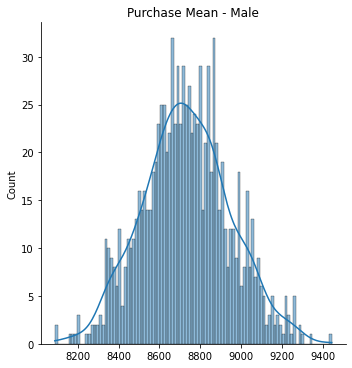

In [39]:
sns.displot(male_expenses_mean,bins=100, kde=True)
plt.title('Purchase Mean - Male')

###### It's observed that the mean of all sample means is very close in value to the population mean itself

In [37]:
# Mean of Purchases by Female
female_expenses_mean=[female_df['Purchase'].sample(500).mean() for i in range(1000)]

Text(0.5, 1.0, 'Purchase Mean - Female')

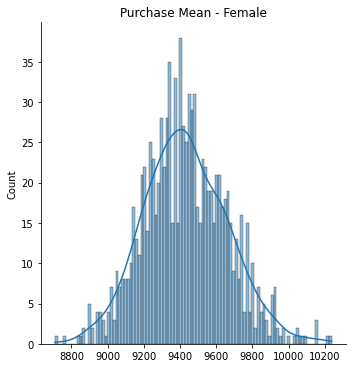

In [38]:
sns.displot(female_expenses_mean,bins=100, kde=True)
plt.title("Purchase Mean - Female")

###### As the CI increase we can see wider confidence interval that is more likely to contain the actual mean value

#### CI Analysis based on Marital Status

In [42]:
## Segregating the Dataset based on Marital Status
single_df = working_df[working_df['Marital_Status'] == 0]
single_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550056,1006022,P00375436,M,26-35,17,C,4+,0,20,254
550059,1006025,P00370853,F,26-35,1,B,1,0,19,48
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371


In [44]:
partnered_df = working_df[working_df['Marital_Status'] == 1]
partnered_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254
...,...,...,...,...,...,...,...,...,...,...
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137


In [49]:
# Population Summary by Marital Status
working_df.groupby(['Marital_Status'])['Purchase'].describe().T

Marital_Status,0,1
count,324731.000000,225337.000000
mean,9265.907619,9261.174574
std,5027.347859,5016.897378
min,12.000000,12.000000
25%,5605.000000,5843.000000
50%,8044.000000,8051.000000
75%,12061.000000,12042.000000
max,23961.000000,23961.000000


In [50]:
# Random sample size of 500 by Marital Status
MS_df500_sample_means = working_df.sample(500).groupby(['Marital_Status'])['Purchase'].describe()
MS_df500_sample_means.T

Marital_Status,0,1
count,313.000000,187.000000
mean,9406.504792,9455.491979
std,4891.070814,4820.296873
min,12.000000,596.000000
25%,6056.000000,6071.500000
50%,8110.000000,8106.000000
75%,12026.000000,12023.000000
max,23699.000000,23101.000000


Text(0.5, 1.0, 'Purchase Mean - Single')

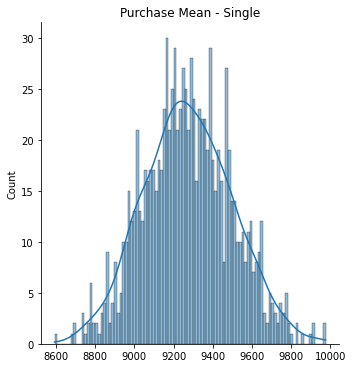

In [51]:
# Mean Purchase by Marital Status - Single
single_expenses_mean=[single_df['Purchase'].sample(500).mean() for i in range(1000)]
sns.displot(single_expenses_mean,bins=100, kde=True)
plt.title('Purchase Mean - Single')

Text(0.5, 1.0, 'Purchase Mean - Partnered')

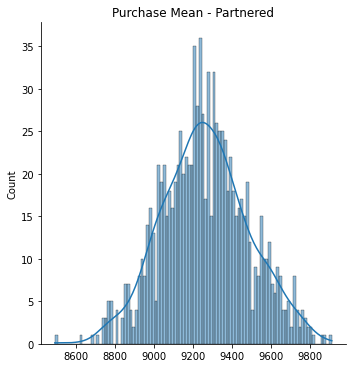

In [52]:
# Mean Purchase by Marital Status - Partnered
partnered_expenses_mean=[partnered_df['Purchase'].sample(500).mean() for i in range(1000)]
sns.displot(partnered_expenses_mean,bins=100, kde=True)
plt.title('Purchase Mean - Partnered')

In [53]:
working_df.sample(500).groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,12.0,7278.250000,4055.308869,375.0,4285.25,7771.5,9528.5,13574.0
18-25,86.0,8918.744186,5121.646383,355.0,5264.00,8064.5,11961.0,20516.0
26-35,187.0,9717.967914,5060.369476,701.0,6714.50,8068.0,12851.5,21224.0
36-45,104.0,9236.519231,4702.308276,38.0,5994.00,8866.5,11949.0,23637.0
46-50,48.0,8202.750000,4830.516194,138.0,5319.00,7080.0,10337.0,23523.0
51-55,30.0,8704.400000,5574.835118,757.0,5147.00,7371.5,12934.5,19211.0
55+,33.0,8598.424242,4591.044761,1058.0,5236.00,7966.0,11627.0,18990.0


# 6. Insights

#### Based on the EDA on the entire dataset, we can see clearly that the data is skewed highly towards male population 

*   High volume & repeated purchases are done by Male
*   75% of the Customers are Male.
*   42% of the customers are from the City B
*   About 35% of the customers have lived atleast 1 year in the current city, 
    and the least 13% is lived in less than a year
*   78% of the customers are of age b/w 18 to 45
*   Only 11% are below 18 yrs and 33% are above 50 yrs
*   Singles have done more purchases than 'partnered' both by count & value
*   Male, Singles standout clearly in terms of volume and value of purchases
*   In Occupation we see more customers are from 4 and 8 unit category 
*   Similarly lower end product category have more count of sales
*   Larger purchase is b/w 5K to 12K
*   Incidently in terms of # of yrs of stay in the city also topped by Male, 
    Singles in 1 yr of stay category. 
*   The age group 26-35 has more number of customers especially in Male, 
    Singles segment
*   Male segment seem to have spread across in various Occupation types
*   The product with ID: P00265242 was purchased more number of times
*   City B seem to have large customer base and
*   1 year of Stay in the current City more customers
*   As the Confidence Interval has increased we have seen wider confidence 
    interval that is more likely to contain the actual mean value
*   The CI analysis at 0.9, 0.95 and 0.99 by gender clearly shows male 
    customers are purchasing more
*   Similary CI analysis by Marital Status indicate thatn Singles do more 
    purchases



# 7. Recommendations

#### Clearly there are few straightforward opportunities to explore:

*   Increase female customer count with personalized products
*   Come up with region-wise promotions to incease customer base in City A and C
*   May be, introduce a 'Wedding Package' category of products to attract more 
    customers who turn into 'Partnered' segment
*   Special discounts can be offered to other age groups other than 18 to 45
*   New product category can be introduced associated with School/Studies to 
    attract more customers who are below 18 yrs
*   Customized products for higher-end occupation category may yield more 
    customers 
*   Free accessories along with the products of higher price can increase the 
    sales in that segment



---



---

